In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt
import wandb

In [10]:
def sigmoid(z):
    
    return 1/(1+np.exp(-z))


In [ ]:
def forward_prop(A0,W1,b1,W2,b2):
    

    Z1= np.dot(W1,A0) + b1

    A1=sigmoid(Z1)

    Z2= np.dot(W2,A1) +b2

    A2= sigmoid(Z2)

    cache=(A0,A1,A2,Z1,Z2)

    return A2,cache


In [ ]:
def back_prop(y,cache,W2):

    (A0,A1,A2,Z1,Z2) = cache

    m=A0.shape[1]

    dA2= -y/A2 + (1-y)/(1-A2)   
    dZ2 = dA2 * A2*(1-A2)
    dW2=1/m*np.dot(dZ2,A1.T)
    db2=1/m*np.sum(dZ2,keepdims=True,axis=0)

    dA1= np.dot(W2.T,dZ2)
    dZ1= dA1*A1 *(1-A1)
    dW1=1/m*np.dot(dZ1, A0.T)
    db1=1/m*np.sum(dZ1,keepdims=True,axis=0)


    grads=(dW1,db1,dW2,db2)

    return grads

In [13]:
def compute_loss(y, A2):
    N = y.shape[0]
    loss = -(1/N) * np.sum(y*np.log(A2 + 1e-8) + (1-y)*np.log(1 - A2 + 1e-8))
    return loss


In [20]:
def train(A0,y,hidden_dim,epochs,alpha):

    np.random.seed(1)
    input_dim = A0.shape[0]
    output_dim = 1

    # Initialize weights
    W1 = np.random.randn(hidden_dim, input_dim) * 0.01
    b1 = np.zeros((hidden_dim, 1))
    W2 = np.random.randn(output_dim, hidden_dim) * 0.01
    b2 = np.zeros((output_dim, 1))

    losses = []
    accuracies = []

    for i in range(epochs):

        A2,cache=forward_prop(A0,W1,b1,W2,b2)

        loss=compute_loss(y,A2)
        losses.append(loss)

    
        preds = np.zeros_like(A2, dtype=int)

        for j in range(A2.shape[1]):   
            if A2[0, j] > 0.5:
                preds[0, j] = 1
            else:
                preds[0, j] = 0

        acc = np.mean(preds == y)
        accuracies.append(acc)

        grads=back_prop(y,cache,W2)

        (dW1,dB1,dW2,dB2)= grads

        W2= W2- alpha*dW2
        b2= b2- alpha*dB2
        W1= W1- alpha*dW1
        b1= b1- alpha*dB1

        
        if i % 1000 == 0:
            print(f"Epoch {i}, Loss: {loss:.4f}")

    return W1,b1,W2,b2,losses,accuracies


In [15]:
def predict(X, W1, b1, W2, b2):
    A2, _ = forward_prop(X, W1, b1, W2, b2)
    predictions = np.zeros_like(A2, dtype=int)

    for i in range(A2.shape[1]):   # loop over all training examples
        if A2[0, i] > 0.5:
            predictions[0, i] = 1
        else:
            predictions[0, i] = 0

    return predictions

Epoch 0, Loss: 2.7727
Epoch 1000, Loss: 0.0162
Epoch 2000, Loss: 0.0081
Epoch 3000, Loss: 0.0054
Epoch 4000, Loss: 0.0040
Epoch 5000, Loss: 0.0032
Epoch 6000, Loss: 0.0027
Epoch 7000, Loss: 0.0023
Epoch 8000, Loss: 0.0020
Epoch 9000, Loss: 0.0018
Final Predictions: [[0 1 1 0]]


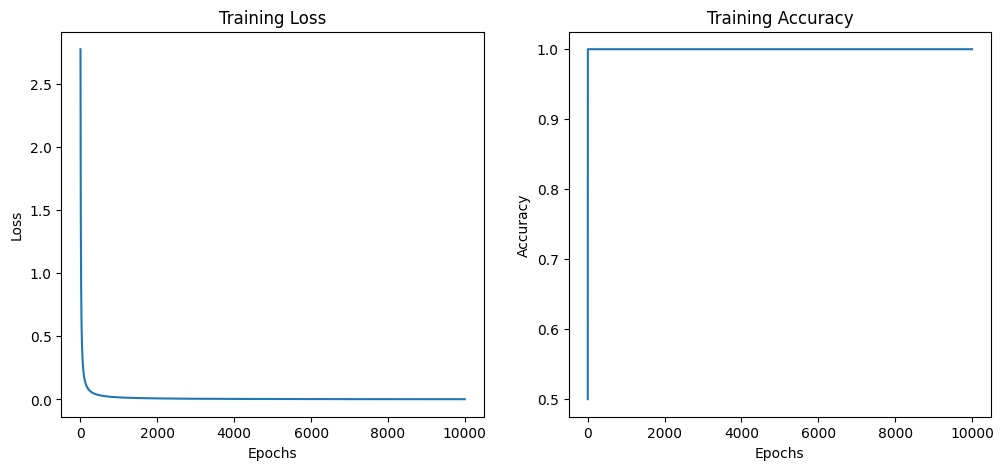

In [27]:
A0 = np.array([[0,0],[0,1],[1,0],[1,1]]).reshape(2,4)
y = np.array([[0],[1],[1],[0]]).reshape(1,4)

W1, b1, W2, b2, losses, accuracies = train(A0, y, hidden_dim=2, alpha=1.0, epochs=10000)

preds = predict(A0, W1, b1, W2, b2)
print("Final Predictions:", preds)


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.plot(accuracies)
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.show()